# Kaggle_Titanic_sklearn_keras

In [1]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing, linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train=pd.read_csv('/Users/jimmyfu87/JupyterNotebook/Dataset/titanic/titanic_train.csv')
test=pd.read_csv('/Users/jimmyfu87/JupyterNotebook/Dataset/titanic/titanic_test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.shape

(418, 11)

In [6]:
train.shape

(891, 12)

In [7]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
data=train.append(test)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
#取消重複index，重新排列index
data.reset_index(inplace=True, drop=True)

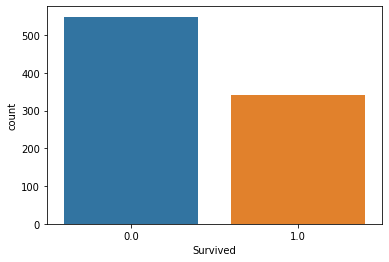

In [10]:
#x軸為survive or not
sns.countplot(data['Survived'])

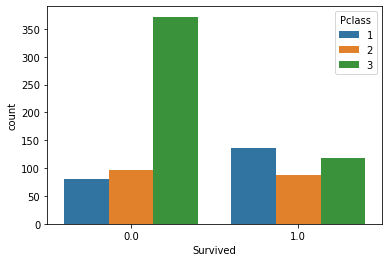

In [11]:
#hue可根據Pclass有不同顏色
sns.countplot(data['Survived'],hue=data['Pclass'])

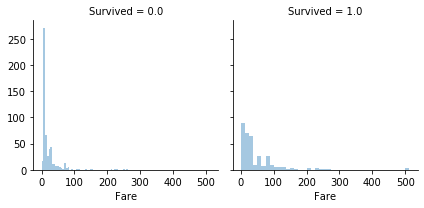

In [12]:
g=sns.FacetGrid(data,col='Survived')
g.map(sns.distplot,'Fare',kde=False)

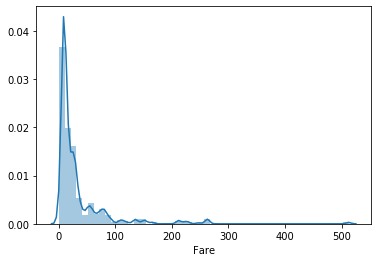

In [13]:
#取Fare的平均值
fare_mean=np.mean(data['Fare'])
#用平均值填補NaN
data['Fare']=data['Fare'].fillna(fare_mean)
#將Fare的Float轉乘int
data['Fare'].astype('int')
sns.distplot(data['Fare'])

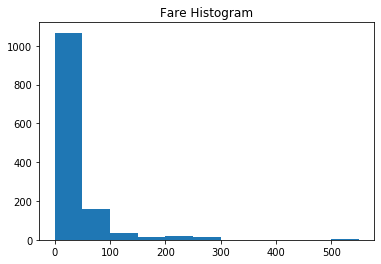

In [14]:
plt.hist(data['Fare'],bins=[0,50,100,150,200,250,300,350,400,500,550])
plt.title("Fare Histogram")
plt.show()

In [15]:
# 將 Age 遺漏值以 median 填補
age_median = np.nanmedian(train["Age"])
new_Age = np.where(data["Age"].isnull(), age_median, data["Age"])
data["Age"] = new_Age
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
# 創造 dummy variables(只會產生一個變數)
label_encoder = preprocessing.LabelEncoder()
encoded_Sex = label_encoder.fit_transform(data["Sex"])
encoded_Sex

array([1, 0, 0, ..., 1, 1, 1])

In [17]:
# 創造 one-hot(產生多個變數)
data = pd.get_dummies(data=data,columns=['Embarked'])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,0,0,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,1,0,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,0,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,0,0,1


In [18]:
for i in range(len(train)):
    if(data["Embarked_C"][i]==0 and data["Embarked_Q"][i]==0 and data["Embarked_S"][i]==0):
        print("It has null")

It has null
It has null


In [19]:
type(data)

pandas.core.frame.DataFrame

In [20]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Sex'] = data['Sex'].map({'male':0,'female':1})

In [21]:
data['Embarked_C'] = data['Embarked_C'].fillna(data['Embarked_C'].mean())
data['Embarked_Q'] = data['Embarked_Q'].fillna(data['Embarked_Q'].mean())
data['Embarked_S'] = data['Embarked_S'].fillna(data['Embarked_S'].mean())
data['Sex'].isnull().sum()
data.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

In [22]:
train_data=data.iloc[0:891,:]
test_data=data.iloc[891:1309,:]

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X =train_data[['Pclass', 'Age', 'Embarked_C',
       'Embarked_Q', 'Embarked_S','Sex']]
y =train_data['Survived']
#Minmax標準化特徵值(結果變差取消)
# minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,1))
# Minmax_X=minmax_scale.fit_transform(X)
# #Minmax後，(type會變numpy、column names會改變)，(轉回dataframe、columns=X.columns將column names還原)
# X=pd.DataFrame(Minmax_X,columns=X.columns) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=33)

In [24]:
from sklearn.linear_model import LogisticRegression
lr_model= LogisticRegression(random_state=10,max_iter=100)
lr_model.fit(X_train,y_train)
lr_predictions = lr_model.predict(X_val)
lr_probs = lr_model.predict_proba(X_val)[:, 1]

In [25]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(max_depth = 3)
tree_model.fit(X_train,y_train)
# Predicting results for test dataset
tree_predictions = tree_model.predict(X_val)
tree_probs = tree_model.predict_proba(X_val)[:, 1]

<function matplotlib.pyplot.show(*args, **kw)>

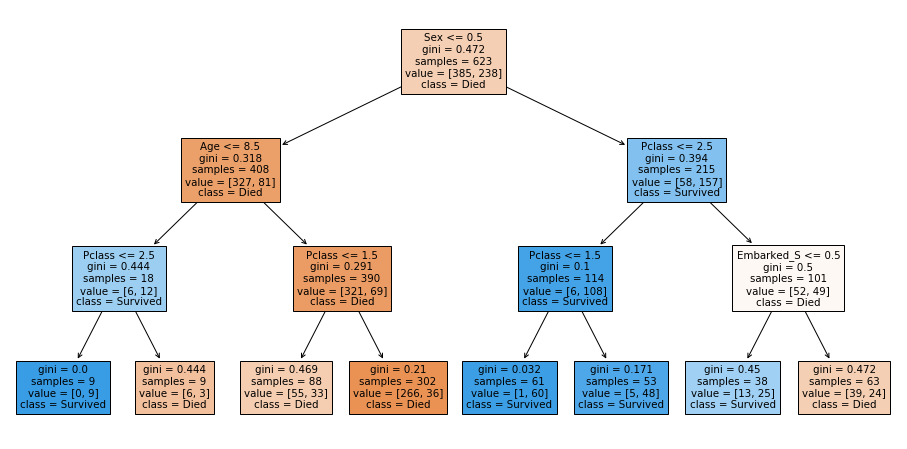

In [26]:
#決策樹視覺化，左邊是True，右邊是False(較簡單畫法)
y_train_df=pd.DataFrame(y_train) #將series轉成dataframe才可以放入class_names
plt.figure(figsize = (16, 8))
tree.plot_tree(tree_model,
               feature_names = X_train.columns,
               class_names = ['Died','Survived'],
               filled = True)#著色
plt.show

In [27]:
from sklearn.ensemble import RandomForestClassifier
# Create the model with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
rf_model.fit(X_train, y_train)
# Actual class predictions
rf_predictions = rf_model.predict(X_val)
# Probabilities for each class
rf_probs = rf_model.predict_proba(X_val)[:, 1]

In [28]:
from xgboost import XGBClassifier
from xgboost import plot_tree

xgb_model = XGBClassifier(max_depth=3, n_estimators=3000, learning_rate=0.0015)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_val)
xgb_probs = xgb_model.predict_proba(X_val)[:, 1]

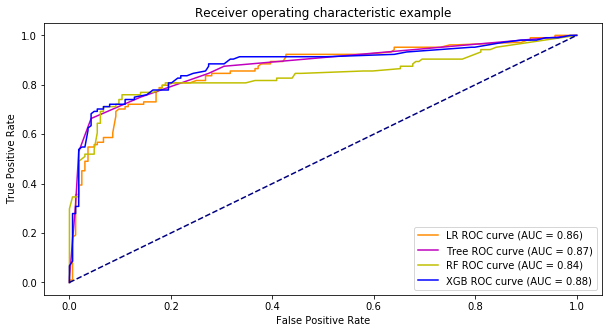

In [29]:
from sklearn.metrics import roc_curve, auc
#Pos_label事先定義好
fpr, tpr, threshold =roc_curve(y_val, lr_probs)
roc_auc = auc(fpr, tpr)
fpr0, tpr0, threshold0 =roc_curve(y_val, tree_probs)
roc_auc0 = auc(fpr0, tpr0)
fpr1, tpr1, threshold1 =roc_curve(y_val, rf_probs)
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 =roc_curve(y_val, xgb_probs)
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange',
             label='LR ROC curve (AUC = %0.2f)'%roc_auc)#四捨五入到小數點第二位
plt.plot(fpr0, tpr0, 'm',
             label='Tree ROC curve (AUC = %0.2f)'%roc_auc0)#四捨五入到小數點第二位
plt.plot(fpr1, tpr1, 'y',
             label='RF ROC curve (AUC = %0.2f)'%roc_auc1)#四捨五入到小數點第二位
plt.plot(fpr2, tpr2, 'b',
             label='XGB ROC curve (AUC = %0.2f)'%roc_auc2)#四捨五入到小數點第二位

plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()   

In [30]:
X_test =test_data[['Pclass', 'Age', 'Embarked_C',
       'Embarked_Q', 'Embarked_S','Sex']]
xgb_predict = xgb_model.predict(X_test)
xgb_predict

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [31]:
submit = pd.read_csv('/Users/jimmyfu87/JupyterNotebook/Dataset/titanic/gender_submission.csv')
submit['Survived'] = xgb_predict
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('/Users/jimmyfu87/JupyterNotebook/Submit_result/submit_titanic.csv', index= False)

# XGB Kaggle_score=0.76555

# Deep Learning(Keras)

In [ ]:
#建立模型
from keras.models import Sequential
from keras.layers import Dense,Dropout
model=Sequential()
model.add(Dense(units=10,input_dim=X_train.shape[1],kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=10,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=20,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=1,kernel_initializer='uniform',activation='relu'))
model.summary()

Using TensorFlow backend.


In [ ]:
from keras.optimizers import Adam
from keras.metrics import binary_crossentropy
model.compile(Adam(lr=.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
train_history=model.fit(x=X_train,y=y_train,validation_split=0.3,epochs=100,batch_size=10,verbose=1)

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

In [ ]:
show_train_history(train_history,'accuracy','val_accuracy')

In [ ]:
show_train_history(train_history,'loss','val_loss')

# ROC v.s Sklearn model

In [ ]:
deep_val=model.predict(X_val, batch_size=5, verbose=1)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_val, deep_val)
roc_auc_keras = auc(fpr_keras, tpr_keras)

In [ ]:
from sklearn.metrics import roc_curve, auc
#Pos_label事先定義好
fpr, tpr, threshold =roc_curve(y_val, lr_probs)
roc_auc = auc(fpr, tpr)
fpr0, tpr0, threshold0 =roc_curve(y_val, tree_probs)
roc_auc0 = auc(fpr0, tpr0)
fpr1, tpr1, threshold1 =roc_curve(y_val, rf_probs)
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 =roc_curve(y_val, xgb_probs)
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange',
             label='LR ROC curve (AUC = %0.2f)'%roc_auc)#四捨五入到小數點第二位
plt.plot(fpr0, tpr0, 'm',
             label='Tree ROC curve (AUC = %0.2f)'%roc_auc0)#四捨五入到小數點第二位
plt.plot(fpr1, tpr1, 'y',
             label='RF ROC curve (AUC = %0.2f)'%roc_auc1)#四捨五入到小數點第二位
plt.plot(fpr2, tpr2, 'b',
             label='XGB ROC curve (AUC = %0.2f)'%roc_auc2)#四捨五入到小數點第二位
plt.plot(fpr_keras, tpr_keras,'g',
             label='Keras ROC curve (AUC = %0.2f)'%roc_auc_keras)#四捨五入到小數點第二位


plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()   

# Prediction

In [ ]:
deep_predict=model.predict(X_test, batch_size=5, verbose=1)

In [ ]:
for i in range(deep_predict.shape[0]):
    if deep_predict[i] >=0.5:
        deep_predict[i]=1
    else:
        deep_predict[i]=0

In [ ]:
submit_deep = pd.read_csv('/Users/jimmyfu87/JupyterNotebook/Dataset/titanic/gender_submission.csv')
submit['Survived'] = deep_predict
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('/Users/jimmyfu87/JupyterNotebook/Submit_result/submit_titanic_deep.csv', index= False)

# DeepLearning Kaggle_score=0.76076